# Diving Deep with Pandas and the Iris Dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

# 1. 🐼 Meet Pandas: Your Data Manipulation Ally

`pandas` stands at the heart of data manipulation in Python. With it, data analysis becomes intuitive and powerful.

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target
iris['species_names'] = data.target_names[data.target]

# 1.1 Peeking at the Data
Whenever you get a new dataset, it's a good habit to take a sneak peek.

In [17]:
iris.head()  # Display the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
iris.tail(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [19]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_names'],
      dtype='object')

# 1.2. Pandas Basics 📊
Getting the Shape
Understand how big your data is.

In [20]:
iris.shape  # returns (rows, columns)

(150, 6)

**Data Types**

It's crucial to know what type of data you're working with.

In [21]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_names         object
dtype: object

**Summary Statistics**

Get the lay of the land (numerically speaking).

In [22]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_names      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
iris.corr()

<ipython-input-24-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


**🎨 Common Pandas Operations**

Selecting or indexing data.

In [25]:
# By column
iris['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

# Counting values

In [26]:
iris['species'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: species, dtype: float64

# 2. 🧭 Data Indexing: Navigate Your Data

To extract precise data:

- Use `.iloc[]` for position-based indexing.
- Use `.loc[]` for label-based indexing.

**Exercise**

Try extracting details of the 5th flower:

In [27]:
fifth_flower = iris.iloc[4]
print(fifth_flower)

sepal length (cm)       5.0
sepal width (cm)        3.6
petal length (cm)       1.4
petal width (cm)        0.2
species                   0
species_names        setosa
Name: 4, dtype: object


Want just its species?

In [28]:
fifth_flower_species = iris.loc[4, 'species']
print(fifth_flower_species)

0


Other index examples

In [29]:
'''
# Setting an Index on DataFrame Creation:
df = pd.DataFrame(data, index=range(1, len(data) + 1))

# Resetting the Index: This will turn the index into a column and create a default integer index
df_reset = df.reset_index()

# Setting an Existing Column as the Index:
df_set = df.set_index('sepal length (cm)')

# Multi-Index (Hierarchical Indexing): You can set multiple columns as indices
df_multi = df.set_index(['species', 'sepal length (cm)'])

# Dropping an Index Level (for MultiIndex):
df_dropped = df_multi.reset_index(level=1)

# Index Slicing: Useful for getting a subset of the DataFrame.
subset = df.loc[5:10]  # Rows from index label 5 to 10
subset_again = df.iloc[5:10]  # Rows from position 5 to 10 (exclusive)

# Using Boolean Indexing: It's common to filter rows based on some column values.
versicolor_df = df[df['species'] == 'versicolor']

# Renaming Index Names or Labels:
df_renamed = df.rename(index={1: 'a', 2: 'b'})

# Getting Index as a Series or Array:
index_series = df.index.to_series()
index_array = df.index.to_numpy()

# The .loc method is primarily label-based indexing. Integers may be used but they are interpreted as labels.

# Selecting a range of rows and a range of columns:
result = df.loc[2:6, 'B':'D']
print(result)

# Conditional slicing with columns:
result = df.loc[df['A'] > 50, ['C', 'D']]
print(result)

# The .iloc method is primarily integer-location based indexing. You have to use integers to specify the rows or columns you want to retrieve.

# Selecting a range of rows and a range of columns:
result = df.iloc[1:5, 1:4]
print(result)
'''


"\n# Setting an Index on DataFrame Creation:\ndf = pd.DataFrame(data, index=range(1, len(data) + 1))\n\n# Resetting the Index: This will turn the index into a column and create a default integer index\ndf_reset = df.reset_index()\n\n# Setting an Existing Column as the Index:\ndf_set = df.set_index('sepal length (cm)')\n\n# Multi-Index (Hierarchical Indexing): You can set multiple columns as indices\ndf_multi = df.set_index(['species', 'sepal length (cm)'])\n\n# Dropping an Index Level (for MultiIndex):\ndf_dropped = df_multi.reset_index(level=1)\n\n# Index Slicing: Useful for getting a subset of the DataFrame.\nsubset = df.loc[5:10]  # Rows from index label 5 to 10\nsubset_again = df.iloc[5:10]  # Rows from position 5 to 10 (exclusive)\n\n# Using Boolean Indexing: It's common to filter rows based on some column values.\nversicolor_df = df[df['species'] == 'versicolor']\n\n# Renaming Index Names or Labels:\ndf_renamed = df.rename(index={1: 'a', 2: 'b'})\n\n# Getting Index as a Series or

# 3. 🕵️‍♂️ Data Filtering: Detect the Outliers

Seek flowers with a sepal length (cm) over 7. These might be the botanical equivalent of giants!

In [30]:
large_flowers = iris[iris['sepal length (cm)'] > 7]
large_flowers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
102,7.1,3.0,5.9,2.1,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica
118,7.7,2.6,6.9,2.3,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
125,7.2,3.2,6.0,1.8,2,virginica
129,7.2,3.0,5.8,1.6,2,virginica
130,7.4,2.8,6.1,1.9,2,virginica


# 4. 📉 Data Sorting: Organize Your Insights
Sorting by petal length can highlight the smallest and largest flowers.

In [31]:
sorted_flowers = iris.sort_values(by='petal length (cm)', ascending=False)
sorted_flowers.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
118,7.7,2.6,6.9,2.3,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
131,7.9,3.8,6.4,2.0,2,virginica


# 5. 📊 Data Aggregation: Get the Big Picture

Let's retrieve:

- Average sepal length
- Shortest petal
- Most common species

In [32]:
average_sepal_length = iris['sepal length (cm)'].mean()
shortest_petal = iris['petal length (cm)'].min()
common_species = iris['species'].mode()[0]

print(f"Average Sepal Length: {average_sepal_length}")
print(f"Shortest Petal: {shortest_petal}")
print(f"Most Common Species: {common_species}")

Average Sepal Length: 5.843333333333334
Shortest Petal: 1.0
Most Common Species: 0


# 6. 🍝 All roads lead to Rome

Calculating the mean of the 'sepal length (cm)' column from the Iris dataset

In [33]:
# Method 1: Direct Pandas method
mean_1 = iris['sepal length (cm)'].mean()

# Method 2: Using numpy on the Pandas Series
import numpy as np
mean_2 = np.mean(iris['sepal length (cm)'])

# Method 3: Manual calculation using Pandas
mean_3 = iris['sepal length (cm)'].sum() / len(iris['sepal length (cm)'])

# Method 4: Manual calculation using numpy
mean_4 = np.sum(iris['sepal length (cm)'].values) / len(iris['sepal length (cm)'].values)

# Method 5: Using `describe` method (more indirect)
mean_5 = iris['sepal length (cm)'].describe()['mean']

print(mean_1, mean_2, mean_3, mean_4, mean_5)

5.843333333333334 5.843333333333334 5.843333333333334 5.843333333333334 5.843333333333334


# 7. Grouping Data
Combine and aggregate data in various ways.

In [34]:
iris.groupby('species').mean()

<ipython-input-34-fc92d35fd8dd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iris.groupby('species').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [35]:
# Group by 'species' and apply multiple aggregation functions
result = iris.groupby('species').agg({
    'sepal length (cm)': ['mean', 'median', 'std'],
    'sepal width (cm)': ['mean', 'min', 'max']
})

print(result)

        sepal length (cm)                  sepal width (cm)          
                     mean median       std             mean  min  max
species                                                              
0                   5.006    5.0  0.352490            3.428  2.3  4.4
1                   5.936    5.9  0.516171            2.770  2.0  3.4
2                   6.588    6.5  0.635880            2.974  2.2  3.8


In [36]:
# Add an artificial 'environment' column
np.random.seed(0)  # for reproducibility
conditions = ['rainy', 'sunny']
iris['environment'] = np.random.choice(conditions, size=iris.shape[0])

grouped = iris.groupby(['species', 'environment']).mean()
print(grouped)

                     sepal length (cm)  sepal width (cm)  petal length (cm)  \
species environment                                                           
0       rainy                 5.160000          3.540000           1.485000   
        sunny                 4.903333          3.353333           1.446667   
1       rainy                 5.916667          2.737500           4.220833   
        sunny                 5.953846          2.800000           4.296154   
2       rainy                 6.491667          2.954167           5.508333   
        sunny                 6.676923          2.992308           5.592308   

                     petal width (cm)  
species environment                    
0       rainy                0.255000  
        sunny                0.240000  
1       rainy                1.279167  
        sunny                1.369231  
2       rainy                2.004167  
        sunny                2.046154  


<ipython-input-36-5ba5c643a475>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = iris.groupby(['species', 'environment']).mean()


# 8. Handling Missing Values
Find and deal with the missing data (the Iris dataset doesn't have any missing values, but it's good to know).

In [37]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_names        0
environment          0
dtype: int64

In [38]:
# This won't do anything here, but just for the sake of demonstration:
iris.fillna(method='ffill')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names,environment
0,5.1,3.5,1.4,0.2,0,setosa,rainy
1,4.9,3.0,1.4,0.2,0,setosa,sunny
2,4.7,3.2,1.3,0.2,0,setosa,sunny
3,4.6,3.1,1.5,0.2,0,setosa,rainy
4,5.0,3.6,1.4,0.2,0,setosa,sunny
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,rainy
146,6.3,2.5,5.0,1.9,2,virginica,sunny
147,6.5,3.0,5.2,2.0,2,virginica,sunny
148,6.2,3.4,5.4,2.3,2,virginica,sunny


# 9. Applying Functions

Using `apply` and `lambda` to manipulate data.

In [39]:
iris['sepal length (cm)'].apply(lambda x: x * 10)  # Convert to mm

0      51.0
1      49.0
2      47.0
3      46.0
4      50.0
       ... 
145    67.0
146    63.0
147    65.0
148    62.0
149    59.0
Name: sepal length (cm), Length: 150, dtype: float64

# 🎨🎨🎨 Visualization time!

# Pandas
Pandas has built-in plotting capabilities built on top of `matplotlib`. It makes creating basic visualizations straightforward without needing to use `matplotlib` directly for simple cases.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

# 1. Line Plot
By default, the plot() method produces a line plot. It can be useful for timeseries data, but let's just plot the sepal length:

<Axes: >

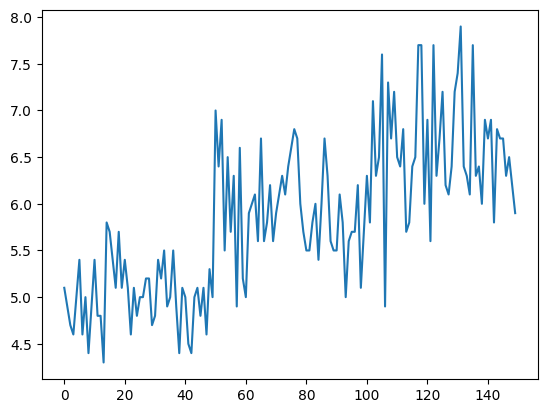

In [40]:
iris['sepal length (cm)'].plot()

# 2. Scatter Plot
You can create a scatter plot between two features:

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

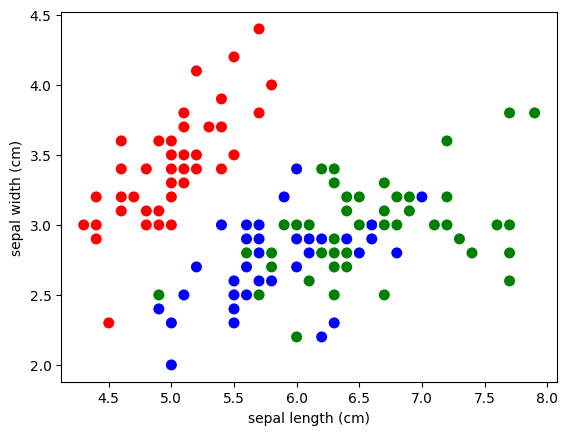

In [41]:
# Create a color map for the species
color_map = {
    0: 'red',  # setosa
    1: 'blue', # versicolor
    2: 'green' # virginica
}
colors = iris['species'].map(color_map)

iris.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=colors, edgecolors='w', s=80)

# 3. Histogram
To view the distribution of a feature:

<Axes: ylabel='Frequency'>

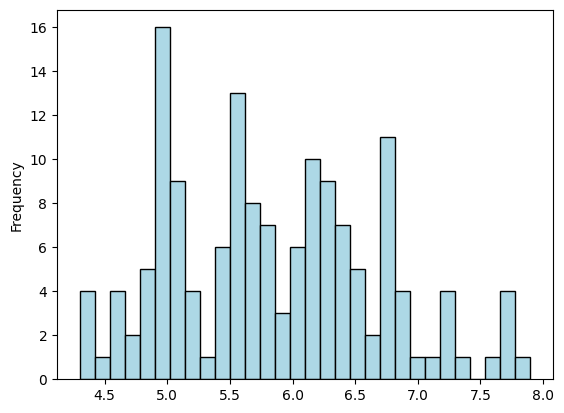

In [42]:
iris['sepal length (cm)'].plot.hist(bins=30, color='lightblue', edgecolor='black')

# 4. Pie Chart
Let's first create a frequency count for the species:

<Axes: ylabel='species'>

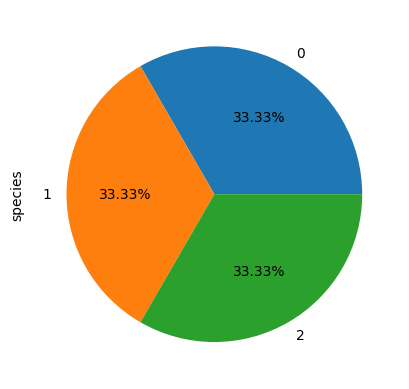

In [43]:
iris['species'].value_counts().plot.pie(autopct='%.2f%%')

# 5. Bar Plot
Useful for comparing data across categories:

<Axes: xlabel='species'>

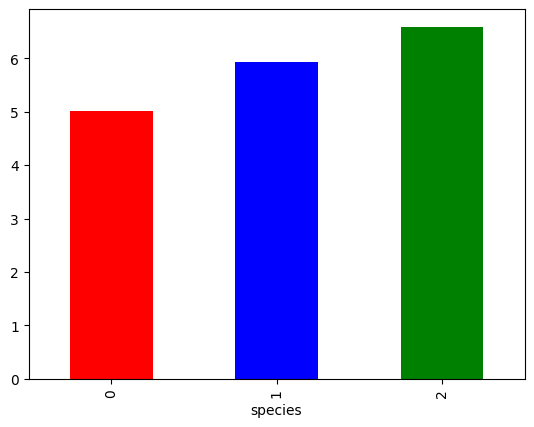

In [44]:
iris.groupby('species')['sepal length (cm)'].mean().plot.bar(color=['red', 'blue', 'green'])

# Matplotlib and Seaborn

**Matplotlib:**
Matplotlib is a foundational plotting library in Python that offers a wide variety of visualization tools. Born in 2003, its versatility allows for both quick data exploration and the creation of detailed, publication-quality graphics.

**Seaborn:**
Seaborn is a statistical visualization library built on Matplotlib. It simplifies the creation of intricate visualizations and provides themes and color palettes to make plots aesthetically pleasing.

# Plotly

Plotly is a modern visualization library that produces interactive and aesthetically pleasing graphics. It supports numerous chart types, including scatter plots, bar charts, and 3D plots. One of Plotly's strengths is its ability to render web-ready visualizations directly, making it valuable for data presentation on the web.

In [45]:
# !pip install plotly
import plotly.express as px

### Scatter plot

In [46]:
fig = px.scatter(iris,
                 x="sepal length (cm)",
                 y="sepal width (cm)",
                 color="species",
                 size="petal length (cm)")

# Customize the hovertemplate
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br><br>" +
                  "Sepal Length: %{x} cm<br>" +
                  "Sepal Width: %{y} cm<br>" +
                  "Petal Length: %{marker.size} cm",
    hovertext=iris["species_names"]
)

fig.show()

# Box plot

A box plot, also known as a whisker plot, is a graphical representation of the distribution of a dataset. It displays properties of datasets based on a five-number summary: the minimum, first quartile (Q1), median (Q2 or second quartile), third quartile (Q3), and maximum. Here's a breakdown of its components:

1. **Box**: The main body of the plot, representing the interquartile range (IQR):
- Bottom of the Box: The first quartile (Q1), which is the 25th percentile of the data.
- Top of the Box: The third quartile (Q3), which is the 75th percentile of the data.
- Band inside the Box: The median (Q2), which represents the 50th percentile or the center of the dataset.

2. **Whiskers**: These are the lines that extend from the top and bottom of the box.
- Bottom Whisker: Extends from Q1 to the smallest data point within 1.5 * IQR.
- Top Whisker: Extends from Q3 to the largest data point within 1.5 * IQR.

3. **Outliers**: Data points that fall outside of the whiskers (i.e., outside 1.5 times the IQR) are considered outliers and are typically represented as individual points outside the whiskers.





In [47]:
fig = px.box(iris, x="species_names", y="sepal length (cm)", title="Sepal Length Boxplot by Species")
fig.show()

### Bar Chart

In [48]:
avg_sepal_length = iris.groupby('species')['sepal length (cm)'].mean().reset_index()
fig = px.bar(avg_sepal_length, x='species', y='sepal length (cm)', title='Average Sepal Length per Species')
fig.show()

### 3D scatter plots

In [49]:
fig = px.scatter_3d(iris,
                    x='sepal length (cm)',
                    y='sepal width (cm)',
                    z='petal length (cm)',
                    color='species')
fig.show()


### Animation

This code will create a scatter plot animation where data points are plotted one-by-one in ascending order of sepal length. The buttons under the plot allow you to play and pause the animation.

In real-world scenarios, the "frame" could represent time periods (like days, months, years) or stages of a process. The animation then gives you an opportunity to visualize how data points evolve over these frames.

In [50]:
# Add a 'frame' column for the animation
iris = iris.sort_values(by='sepal length (cm)').reset_index(drop=True)
iris["frame"] = iris.index

fig = px.scatter(iris,
                 x="sepal length (cm)",
                 y="sepal width (cm)",
                 color="species",
                 animation_frame="frame",
                 animation_group="species",
                 range_x=[4, 8],  # static x-axis range
                 range_y=[1.5, 5]  # static y-axis range
                )

fig.show()

In [51]:
fig.write_html("plotly_plot.html")